# Remove duplicates, check for inconsistencies and standardise (or normalise or scale) the dataProblem Statement: Analysing Customer Churn in a Telecommunications Company
● Import the "Telecom_Customer_Churn.csv" dataset. 

● Handle missing values in the dataset, deciding on an appropriate strategy. 
    
● Remove duplicates, check for inconsistencies and standardise (or normalise or scale) the data

● Convert columns to the correct data types as needed. 

● Identify and handle outliers in the data. 

● Perform feature engineering, creating new features that may be relevant to predicting customer churn.

● Split the dataset into training and testing sets for further analysis. 

● Export the cleaned dataset for future analysis or modelling.

# Import the "Telecom_Customer_Churn.csv" dataset. 

In [46]:
import pandas as pd
telecom= pd.read_csv('../../../Datasets/TelecomCustomer_Churn.csv')
telecom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,750.00,29.85,No
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,F,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Handle missing values in the dataset, deciding on an appropriate strategy. 

In [47]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7037 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7042 non-null   object 
 4   Dependents        7042 non-null   object 
 5   tenure            7038 non-null   float64
 6   PhoneService      7042 non-null   object 
 7   MultipleLines     7041 non-null   object 
 8   InternetService   7040 non-null   object 
 9   OnlineSecurity    7042 non-null   object 
 10  OnlineBackup      7040 non-null   object 
 11  DeviceProtection  7041 non-null   object 
 12  TechSupport       7040 non-null   object 
 13  StreamingTV       7040 non-null   object 
 14  StreamingMovies   7041 non-null   object 
 15  Contract          7038 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [48]:
telecom.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [49]:
telecom.isna().sum()

customerID           0
gender               6
SeniorCitizen        0
Partner              1
Dependents           1
tenure               5
PhoneService         1
MultipleLines        2
InternetService      3
OnlineSecurity       1
OnlineBackup         3
DeviceProtection     2
TechSupport          3
StreamingTV          3
StreamingMovies      2
Contract             5
PaperlessBilling     0
PaymentMethod        5
MonthlyCharges       2
TotalCharges        14
Churn                3
dtype: int64

## Imputation

In [50]:
num_cols = []
categorical_cols = []
for idx,val in telecom.isna().sum().items():
    if val > 0:
        if len(telecom[idx].value_counts()) > 10:
            num_cols.append(idx)
        else:
            categorical_cols.append(idx)

In [51]:
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

In [52]:
categorical_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod',
 'Churn']

In [53]:
categorical_cols.remove('Churn')

In [54]:
for col in num_cols:
    mean = telecom[col].mean()
    telecom[col] = telecom[col].fillna(mean)

for col in categorical_cols:
    mode = telecom[col].mode()[0]
    telecom[col] = telecom[col].fillna(mode)

In [55]:
telecom.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               3
dtype: int64

## Removal

In [56]:
telecom = telecom.dropna()

In [57]:
telecom.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Remove duplicates, check for inconsistencies and standardise (or normalise or scale) the data

In [58]:
telecom[telecom.duplicated()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
30,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes
42,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes
60,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes


In [59]:
telecom = telecom.drop_duplicates()

In [60]:
telecom.shape

(7037, 21)

In [61]:
telecom.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [62]:
telecom['MonthlyCharges'] = telecom['MonthlyCharges'].astype('int64')
telecom['TotalCharges'] = telecom['TotalCharges'].astype('int64')

In [63]:
telecom.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges        int64
TotalCharges          int64
Churn                object
dtype: object

In [64]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
telecom[['MonthlyCharges','TotalCharges']] = scaler.fit_transform(telecom[['MonthlyCharges','TotalCharges']])

In [65]:
telecom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,19.817993,-0.994840,No
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,-0.253366,-0.173015,No
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,-0.340130,-0.959935,Yes
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),-0.658264,-0.194665,No
4,9237-HQITU,F,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,0.151531,-0.940935,Yes


# Identify and handle outliers in the data. 

<Axes: ylabel='MonthlyCharges'>

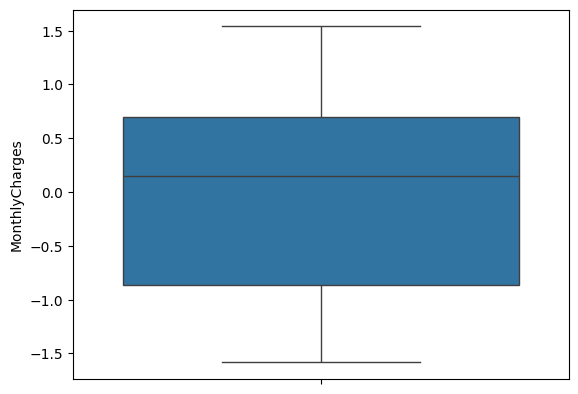

In [89]:
import seaborn as sns
sns.boxplot(telecom['MonthlyCharges'])

In [80]:
threashold = telecom['MonthlyCharges'].std() * 3

In [83]:
outliers = telecom[(telecom['MonthlyCharges'] > threashold) | (telecom['MonthlyCharges'] < -threashold)]
outliers

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1.000000,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,19.817993,-0.994840,No
11,7469-LKBCI,Male,0,No,No,32.347826,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.817993,-0.863613,No
17,9959-WOFKT,Male,0,No,Yes,71.000000,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,Two year,No,Bank transfer (automatic),3.043658,2.254021,No
19,4183-MYFRB,Female,0,No,No,21.000000,Yes,No,Fiber optic,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,19.817993,-0.184944,No
26,6467-CHFZW,Male,0,Yes,Yes,47.000000,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,19.817993,1.090652,Yes
35,6234-RAAPL,Female,0,Yes,Yes,72.000000,Yes,Yes,Fiber optic,Yes,...,No,Yes,Yes,No,Month-to-month,No,Bank transfer (automatic),3.043658,2.196140,No
41,9489-DEDVP,Female,0,Yes,Yes,70.000000,Yes,Yes,DSL,Yes,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),4.836777,1.144999,No
56,8769-KKTPH,Female,0,Yes,Yes,63.000000,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,Yes,One year,Yes,Credit card (automatic),3.043658,1.780809,No
59,5954-BDFSG,Male,0,No,No,72.000000,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),8.249486,2.462129,No
74,5630-AHZIL,Female,0,No,Yes,3.000000,Yes,No,DSL,Yes,...,No,Yes,No,Yes,Month-to-month,Yes,Bank transfer (automatic),3.043658,-0.929448,No


In [85]:
telecom = telecom[(telecom['MonthlyCharges'] < threashold) & (telecom['MonthlyCharges'] > -threashold)]
telecom.shape

(7026, 21)

# Perform feature engineering, creating new features that may be relevant to predicting customer churn.

In [94]:
telecom['early churn'] = (telecom['Churn']=='Yes') & (telecom['tenure']>=12.0)

In [95]:
telecom.head().T

,1,2,3,4,5
customerID,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU,9305-CDSKC
gender,Male,Male,Male,F,Female
SeniorCitizen,0,0,0,0,0
Partner,No,No,No,No,No
Dependents,No,No,No,No,No
tenure,34.0,2.0,45.0,2.0,8.0
PhoneService,Yes,Yes,No,Yes,Yes
MultipleLines,No,No,No phone service,No,Yes
InternetService,DSL,DSL,DSL,Fiber optic,Fiber optic
OnlineSecurity,Yes,Yes,Yes,No,No


# Split the dataset into training and testing sets for further analysis. 

In [108]:
n = telecom.shape[0]
count = int(n*0.8)
shuffled_df = telecom.sample(frac=1)


train_set = shuffled_df[:count]
test_set = shuffled_df[count:]

# Export the cleaned dataset for future analysis or modelling.

In [110]:
train_set.to_csv()
test_set.to_csv();